# Classification de page Internet en utilisant le dataset de Nicholas Kushmerick

## Contexte

# Importation des données

In [28]:
import warnings
warnings.filterwarnings('ignore')
import IPython.display
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("seaborn")

print("Dix premières lignes du jeu d'entraînement")
data = pd.read_csv("data_train.csv", sep = "\t")
data.head()

Dix premières lignes du jeu d'entraînement


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X1550,X1551,X1552,X1553,X1554,X1555,X1556,X1557,X1558,outcome
1,33.0,230.0,6.9696,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,59.0,460.0,7.7966,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
5,60.0,234.0,3.9000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [2]:
print(f"Le jeu d'entraînement contient {data.shape[0]} observations et {data.shape[1]} variables")

Le jeu d'entraînement contient 2459 observations et 1559 variables


Vérifions les types des variables

In [3]:
data.dtypes

X1         float64
X2         float64
X3         float64
X4         float64
X5           int64
            ...   
X1555        int64
X1556        int64
X1557        int64
X1558        int64
outcome     object
Length: 1559, dtype: object

Affichons les indicateurs statistiques des différentes variables.

In [4]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X1549,X1550,X1551,X1552,X1553,X1554,X1555,X1556,X1557,X1558
count,1806.000000,1809.000000,1801.000000,2446.000000,2459.00000,2459.000000,2459.000000,2459.00000,2459.000000,2459.000000,...,2459.00000,2459.000000,2459.00000,2459.000000,2459.000000,2459.000000,2459.000000,2459.000000,2459.000000,2459.000000
mean,64.223145,155.238806,3.822937,0.770237,0.00366,0.013013,0.005693,0.00366,0.005287,0.013013,...,0.00610,0.004880,0.00366,0.002033,0.003253,0.006913,0.013013,0.013013,0.011387,0.001220
std,55.242397,129.404394,5.583711,0.420766,0.06040,0.113355,0.075255,0.06040,0.072532,0.113355,...,0.07788,0.069701,0.06040,0.045056,0.056957,0.082876,0.113355,0.113355,0.106121,0.034914
min,2.000000,1.000000,0.001500,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,82.000000,1.043400,1.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51.000000,110.000000,2.086900,1.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,84.750000,184.000000,5.333300,1.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,640.000000,640.000000,60.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
print(f" Pourcentage de données dans la classe nonead. : {data[data['outcome']== 'nonad.'].shape[0] / data.shape[0] * 100:.2f}%")
print(f" Pourcentage de données dans la classe ad. : {data[data['outcome']== 'ad.'].shape[0] / data.shape[0] * 100:.2f}%")

 Pourcentage de données dans la classe nonead. : 85.56%
 Pourcentage de données dans la classe ad. : 14.44%


## Imputation des valeurs manquantes

Nous commençons par vérifier le taux de complétion des variables

In [6]:
rows = data.shape[0]

def test_completion(data):
    """
    Compute sorted completion rate for each variable of the argument in a descending order
    
    Args:
        data(dataset) : A dataset with variables
        
    Returns:
        A specific dataframe with completion rate for each variable. 
        Schema :
            Index : Variable names
            pourcentage d'observations : completion rate
    """
    var_dict = {}
    
    for col in data.columns:
        var_dict[col] = {}
        var_dict[col]['taux_completion'] = round(data[data[col].notna()==1].shape[0]/rows*100,2)
        var_dict[col]['valeurs_manquantes'] = data[data[col].isna()==1].shape[0]
        
    return pd.DataFrame.from_dict(data=var_dict, orient="index").sort_values(by="taux_completion", ascending=False)

print("Affichage du taux de complétion des 10 variables dont le taux est le plus faible.")
test_completion(data).tail(10)

Affichage du taux de complétion des 10 variables dont le taux est le plus faible.


,taux_completion,valeurs_manquantes
X520,100.00,0
X519,100.00,0
X518,100.00,0
X517,100.00,0
X516,100.00,0
X515,100.00,0
X4,99.47,13
X2,73.57,650
X1,73.44,653
X3,73.24,658


Seuls X1, X2, X3 ont des valeurs manquantes. Selon la synthèse des travaux de Nicholas Kushmerick:
- X1, X2, X3 indiquent que les dimensions des images sont présentes dans le code de la page
-  indique que l'image et le lien de redirection associés sont tous les deux sur la même page ou non

Ces données étant issues de l'encodage HTML réalisé par les responsables des sites internet dépend uniquement du fait qu'elles soient renseignées ou non par ces derniers. Nous sommes donc en présence d'un mécanisme MCAR. 

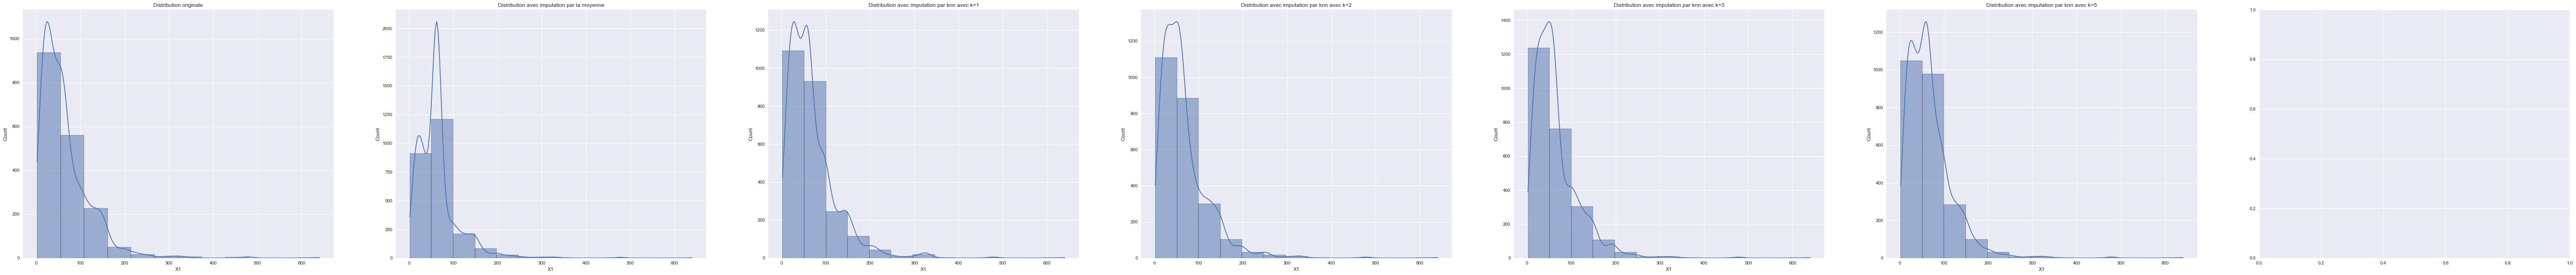

In [7]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

bins = "sturges"
data_copy = data.select_dtypes(['int','float']).copy()
simple_imputer = SimpleImputer(strategy="mean")
knn_imputer_1 = KNNImputer(weights="distance", n_neighbors=1,copy=False)
knn_imputer_2 = KNNImputer(weights="distance", n_neighbors=2,copy=False)
knn_imputer_3 =  KNNImputer(weights="distance", n_neighbors=3,copy=False)
knn_imputer_5 =  KNNImputer(weights="distance", n_neighbors=5,copy=False)
#iterative_imputer = IterativeImputer(max_iter=10, random_state=42)
 
simple_imputed = pd.DataFrame(np.round_(simple_imputer.fit_transform(data_copy)),columns=data_copy.columns, index=data_copy.index )
knn_imputed_1 = pd.DataFrame(np.round_(knn_imputer_1.fit_transform(data_copy)),columns=data_copy.columns, index=data_copy.index)
knn_imputed_2 = pd.DataFrame(np.round_(knn_imputer_2.fit_transform(data_copy)),columns=data_copy.columns, index=data_copy.index)
knn_imputed_3 = pd.DataFrame(np.round_(knn_imputer_3.fit_transform(data_copy)),columns=data_copy.columns, index=data_copy.index)
knn_imputed_5 = pd.DataFrame(np.round_(knn_imputer_5.fit_transform(data_copy)),columns=data_copy.columns, index=data_copy.index)
#iterative_imputed = pd.DataFrame(np.round_(iterative_imputer.fit_transform(data_copy)), columns=data_copy.columns, index=data_copy.index)

fig, axes = plt.subplots(ncols=7, figsize=(100,10))

#original distribution
sns.histplot(ax=axes[0], data=data, x="X1", bins=bins, kde=True)
axes[0].set_title("Distribution originale")

#Imputed with mean
sns.histplot(ax=axes[1], data=simple_imputed,  x="X1", bins=bins, kde=True)
axes[1].set_title("Distribution avec imputation par la moyenne")

#inputed with KNN with k=1
sns.histplot(ax=axes[2], data=knn_imputed_1,  x="X1", bins=bins, kde=True)
axes[2].set_title("Distribution avec imputation par knn avec k=1")

#inputed with KNN with k=2
sns.histplot(ax=axes[3], data=knn_imputed_2,  x="X1", bins=bins, kde=True)
axes[3].set_title("Distribution avec imputation par knn avec k=2")

#inputed with KNN with k=3
sns.histplot(ax=axes[4], data=knn_imputed_3,  x="X1", bins=bins, kde=True)
axes[4].set_title("Distribution avec imputation par knn avec k=3")

#inputed with KNN with k=5
sns.histplot(ax=axes[5], data=knn_imputed_5,  x="X1", bins=bins, kde=True)
axes[5].set_title("Distribution avec imputation par knn avec k=5")

#inputed with iterative imputer
#sns.histplot(ax=axes[6], data=iterative_imputed,  x="X1", bins=bins, kde=True)
#axes[6].set_title("Distribution avec imputation modèle iteratif")

plt.show()

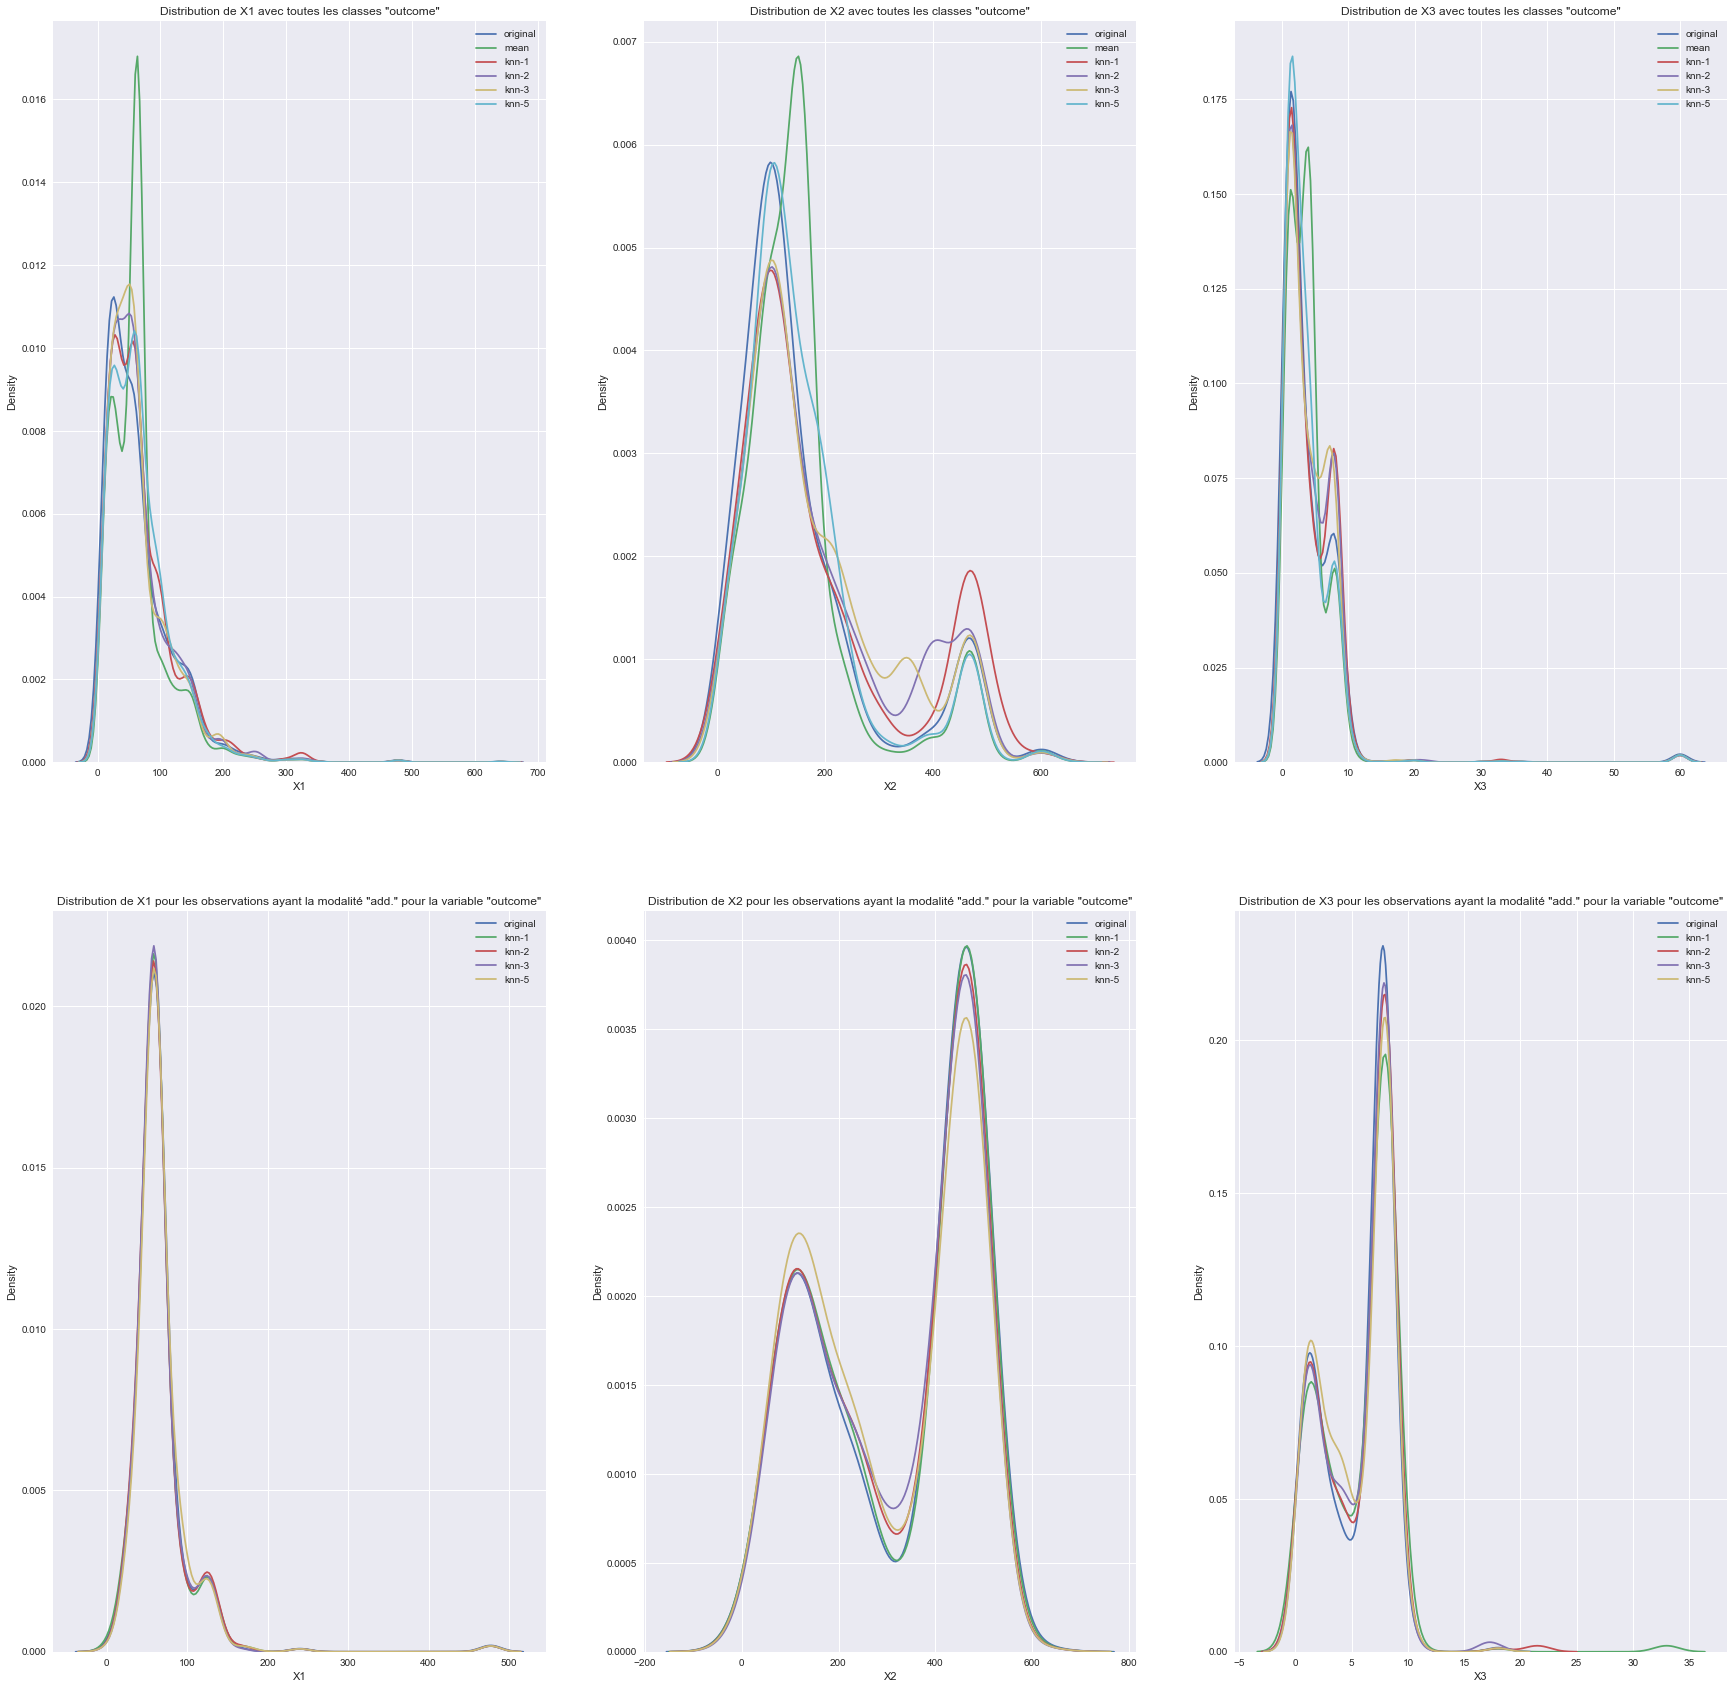

In [8]:
knn_imputed_1['outcome'] = data['outcome'] 
simple_imputed['outcome'] = data['outcome']
knn_imputed_1['outcome'] = data['outcome']
knn_imputed_2['outcome'] = data['outcome']
knn_imputed_3['outcome'] = data['outcome']
knn_imputed_5['outcome'] = data['outcome']

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(30,30))

sns.kdeplot(ax=axes[0,0], data=data, x="X1", label="original")
sns.kdeplot(ax=axes[0,0], data=simple_imputed, x="X1", label="mean")
sns.kdeplot(ax=axes[0,0], data=knn_imputed_1, x="X1", label="knn-1")
sns.kdeplot(ax=axes[0,0], data=knn_imputed_2, x="X1", label="knn-2")
sns.kdeplot(ax=axes[0,0], data=knn_imputed_3, x="X1", label="knn-3")
sns.kdeplot(ax=axes[0,0], data=knn_imputed_5, x="X1", label="knn-5")
axes[0,0].legend()
axes[0,0].set_title('Distribution de X1 avec toutes les classes "outcome"')


sns.kdeplot(ax=axes[0,1], data=data, x="X2", label="original")
sns.kdeplot(ax=axes[0,1], data=simple_imputed, x="X2", label="mean")
sns.kdeplot(ax=axes[0,1], data=knn_imputed_1, x="X2", label="knn-1")
sns.kdeplot(ax=axes[0,1], data=knn_imputed_2, x="X2", label="knn-2")
sns.kdeplot(ax=axes[0,1], data=knn_imputed_3, x="X2", label="knn-3")
sns.kdeplot(ax=axes[0,1], data=knn_imputed_5, x="X2", label="knn-5")
axes[0,1].legend()
axes[0,1].set_title('Distribution de X2 avec toutes les classes "outcome"')


sns.kdeplot(ax=axes[0,2], data=data, x="X3", label="original")
sns.kdeplot(ax=axes[0,2], data=simple_imputed, x="X3", label="mean")
sns.kdeplot(ax=axes[0,2], data=knn_imputed_1, x="X3", label="knn-1")
sns.kdeplot(ax=axes[0,2], data=knn_imputed_2, x="X3", label="knn-2")
sns.kdeplot(ax=axes[0,2], data=knn_imputed_3, x="X3", label="knn-3")
sns.kdeplot(ax=axes[0,2], data=knn_imputed_5, x="X3", label="knn-5")
axes[0,2].legend()
axes[0,2].set_title('Distribution de X3 avec toutes les classes "outcome"')


sns.kdeplot(ax=axes[1,0], data=data[data['outcome']== 'ad.'], x="X1", label="original")
sns.kdeplot(ax=axes[1,0], data=simple_imputed[simple_imputed['outcome']== 'nad.'], x="X1", label="mean")
sns.kdeplot(ax=axes[1,0], data=knn_imputed_1[knn_imputed_1['outcome']== 'ad.'], x="X1", label="knn-1")
sns.kdeplot(ax=axes[1,0], data=knn_imputed_2[knn_imputed_2['outcome']== 'ad.'], x="X1", label="knn-2")
sns.kdeplot(ax=axes[1,0], data=knn_imputed_3[knn_imputed_3['outcome']== 'ad.'], x="X1", label="knn-3")
sns.kdeplot(ax=axes[1,0], data=knn_imputed_5[knn_imputed_5['outcome']== 'ad.'], x="X1", label="knn-5")
axes[1,0].legend()
axes[1,0].set_title('Distribution de X1 pour les observations ayant la modalité "add." pour la variable "outcome"')

sns.kdeplot(ax=axes[1,1], data=data[data['outcome']== 'ad.'], x="X2", label="original")
sns.kdeplot(ax=axes[1,1], data=simple_imputed[simple_imputed['outcome']== 'nad.'], x="X2", label="mean")
sns.kdeplot(ax=axes[1,1], data=knn_imputed_1[knn_imputed_1['outcome']== 'ad.'], x="X2", label="knn-1")
sns.kdeplot(ax=axes[1,1], data=knn_imputed_2[knn_imputed_2['outcome']== 'ad.'], x="X2", label="knn-2")
sns.kdeplot(ax=axes[1,1], data=knn_imputed_3[knn_imputed_3['outcome']== 'ad.'], x="X2", label="knn-3")
sns.kdeplot(ax=axes[1,1], data=knn_imputed_5[knn_imputed_5['outcome']== 'ad.'], x="X2", label="knn-5")
axes[1,1].legend()
axes[1,1].set_title('Distribution de X2 pour les observations ayant la modalité "add." pour la variable "outcome"')

sns.kdeplot(ax=axes[1,2], data=data[data['outcome']== 'ad.'], x="X3", label="original")
sns.kdeplot(ax=axes[1,2], data=simple_imputed[simple_imputed['outcome']== 'nad.'], x="X3", label="mean")
sns.kdeplot(ax=axes[1,2], data=knn_imputed_1[knn_imputed_1['outcome']== 'ad.'], x="X3", label="knn-1")
sns.kdeplot(ax=axes[1,2], data=knn_imputed_2[knn_imputed_2['outcome']== 'ad.'], x="X3", label="knn-2")
sns.kdeplot(ax=axes[1,2], data=knn_imputed_3[knn_imputed_3['outcome']== 'ad.'], x="X3", label="knn-3")
sns.kdeplot(ax=axes[1,2], data=knn_imputed_5[knn_imputed_5['outcome']== 'ad.'], x="X3", label="knn-5")
axes[1,2].legend()
axes[1,2].set_title('Distribution de X3 pour les observations ayant la modalité "add." pour la variable "outcome"')


plt.show()

En observanat l'intégralité des observations, nous observons que l'imputation simple par la moyenne déforme la distribution. Nous constatons, par contre, que pour les différentes imputation par KNN (avc k=1, k=2, k=3, k=5) la distribution reste assez proche de la distribution originale. Les imputation avec k= et k=5 offrents tout de même de meilleurs résultats. Pour les départage, nous onservons uniquement la classe minoritaires des observation anotées "add.". Nous constatons que l'imupation par KNN avec k=3 offre de meilleurs résultats.

Nous décidons donc de garder l'imputation par KNN avec k=3.

Par définition la variable X3 est un ration de entre X2 et X1. L'imputation par KNN, procédant variable par variable, il est possible que l'imputation ne respecte plus le ration. Observons le phénomène. 

In [9]:
data['X1_imputed'] = knn_imputed_3['X1']
data['X2_imputed'] = knn_imputed_3['X2']
data['X3_imputed'] = knn_imputed_3['X3']

data['X3_by_computation'] = np.round_((data['X2_imputed'] / data['X1_imputed']),0)


differences = data[data['X3_imputed']!=data['X3_by_computation']].loc[:,['X3_imputed', 'X3_by_computation']]

print(f"Nombre d'observation ou X3 imputé diffère de X3 calculé {differences.shape[0]}")
print(f"Pourcentage d'observation X3 par imputation et X3 calculé diffèrent {round((differences.shape[0]/data.shape[0])*100,2)}%")

Nombre d'observation ou X3 imputé diffère de X3 calculé 223
Pourcentage d'observation X3 par imputation et X3 calculé diffèrent 9.07%


On observe bien une différence sur un peu plus de 9% des observation.
Nous décidons donc de garder les imputation pour X1 et X2 alors que nous gardons le calcul de ratio pour X3. Nous conservons les valeurs de X1 et X2 avant imputation dans un nouveau dataframe.

In [10]:
originals = data[['X1', 'X2', 'X3']]
data['X1'] = data ['X1_imputed']
data['X2'] = data ['X2_imputed']
data['X3'] = data['X3_by_computation']
data.drop(columns=['X1_imputed', 'X2_imputed', 'X3_imputed', 'X3_by_computation'], inplace=True)

Observons maintenant l'imputation par KNN avec K=3 pour la variable X4

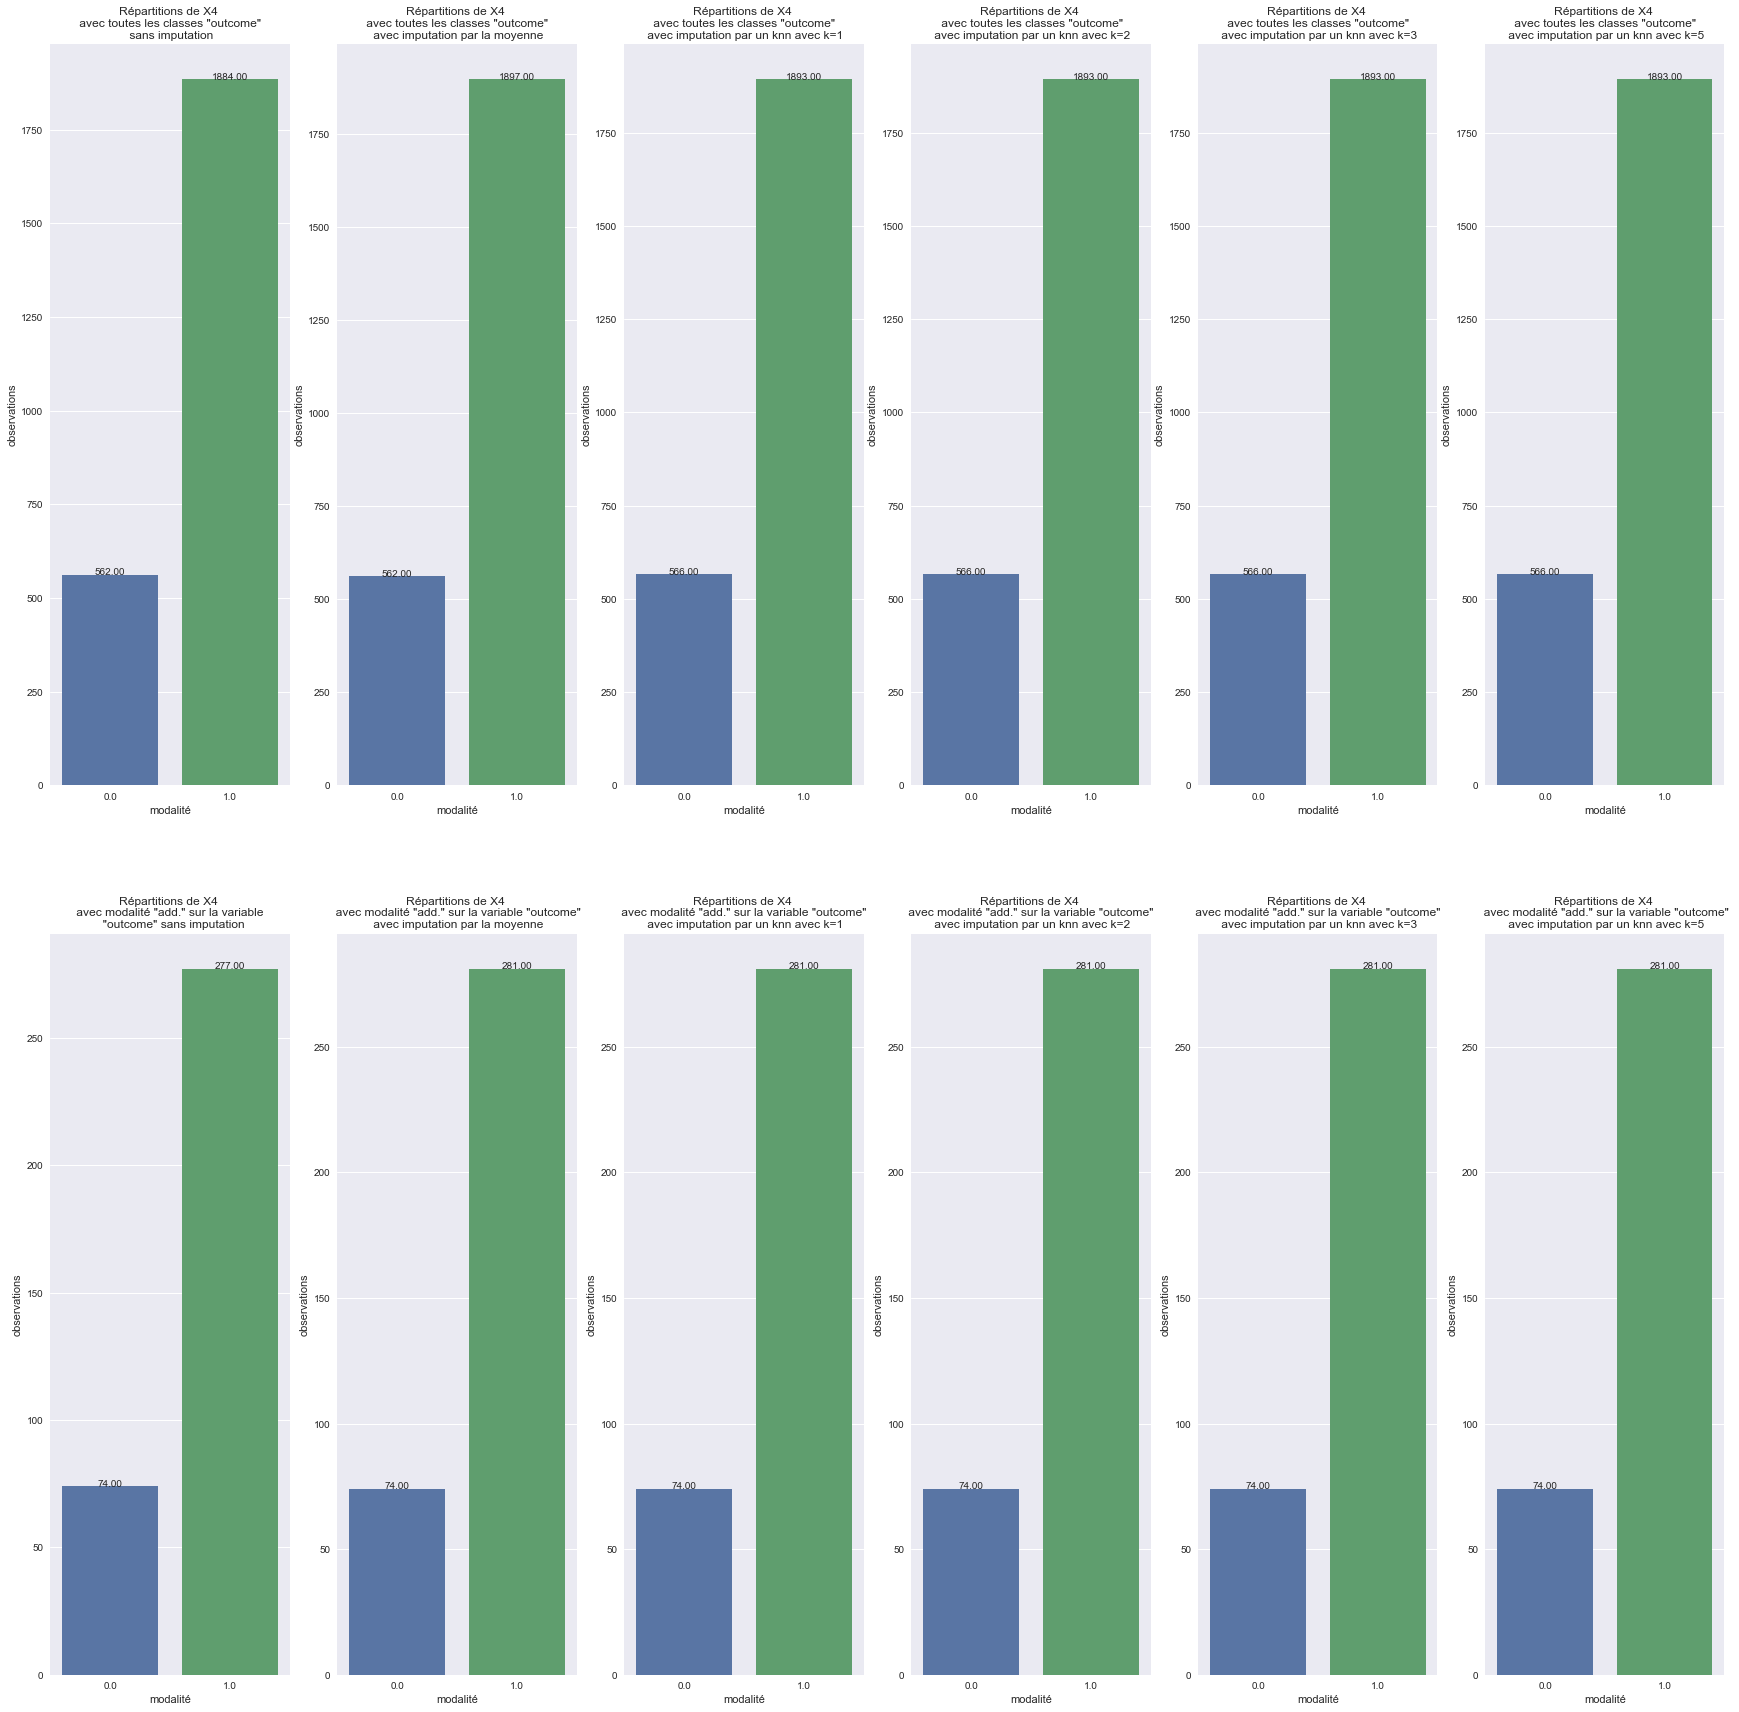

In [11]:
x4_by_outcome_original_all_outcome_x4 = pd.DataFrame(data.groupby(['X4'], as_index=False)['outcome'].agg('count'))
x4_by_outcome_original_all_outcome_x4.rename(columns={'X4':'modalité', 'outcome':'observations'}, inplace=True)
x4_by_outcome_original_all_outcome_x4.set_index('modalité', inplace=True)
x4_by_outcome_original_all_outcome_x4

x4_by_outcome_mean_all_outcome_x4 = pd.DataFrame(simple_imputed.groupby(['X4'], as_index=False)['outcome'].agg('count'))
x4_by_outcome_mean_all_outcome_x4.rename(columns={'X4':'modalité', 'outcome':'observations'}, inplace=True)
x4_by_outcome_mean_all_outcome_x4.set_index('modalité', inplace=True)
x4_by_outcome_mean_all_outcome_x4

x4_by_outcome_knn1_all_outcome_x4 = pd.DataFrame(knn_imputed_1.groupby(['X4'], as_index=False)['outcome'].agg('count'))
x4_by_outcome_knn1_all_outcome_x4.rename(columns={'X4':'modalité', 'outcome':'observations'}, inplace=True)
x4_by_outcome_knn1_all_outcome_x4.set_index('modalité', inplace=True)
x4_by_outcome_knn1_all_outcome_x4

x4_by_outcome_knn2_all_outcome_x4 = pd.DataFrame(knn_imputed_2.groupby(['X4'], as_index=False)['outcome'].agg('count'))
x4_by_outcome_knn2_all_outcome_x4.rename(columns={'X4':'modalité', 'outcome':'observations'}, inplace=True)
x4_by_outcome_knn2_all_outcome_x4.set_index('modalité', inplace=True)
x4_by_outcome_knn2_all_outcome_x4

x4_by_outcome_knn3_all_outcome_x4 = pd.DataFrame(knn_imputed_3.groupby(['X4'], as_index=False)['outcome'].agg('count'))
x4_by_outcome_knn3_all_outcome_x4.rename(columns={'X4':'modalité', 'outcome':'observations'}, inplace=True)
x4_by_outcome_knn3_all_outcome_x4.set_index('modalité', inplace=True)
x4_by_outcome_knn3_all_outcome_x4

x4_by_outcome_knn5_all_outcome_x4 = pd.DataFrame(knn_imputed_5.groupby(['X4'], as_index=False)['outcome'].agg('count'))
x4_by_outcome_knn5_all_outcome_x4.rename(columns={'X4':'modalité', 'outcome':'observations'}, inplace=True)
x4_by_outcome_knn5_all_outcome_x4.set_index('modalité', inplace=True)
x4_by_outcome_knn5_all_outcome_x4


x4_by_outcome_original_add_x4 = pd.DataFrame(data[data['outcome']=='ad.'].groupby(['X4'], as_index=False)['outcome'].agg('count'))
x4_by_outcome_original_add_x4.rename(columns={'X4':'modalité', 'outcome':'observations'}, inplace=True)
x4_by_outcome_original_add_x4.set_index('modalité', inplace=True)
x4_by_outcome_original_add_x4

x4_by_outcome_mean_add_x4 = pd.DataFrame(simple_imputed[simple_imputed['outcome']=='ad.'].groupby(['X4'], as_index=False)['outcome'].agg('count'))
x4_by_outcome_mean_add_x4.rename(columns={'X4':'modalité', 'outcome':'observations'}, inplace=True)
x4_by_outcome_mean_add_x4.set_index('modalité', inplace=True)
x4_by_outcome_mean_add_x4

x4_by_outcome_knn1_add_x4 = pd.DataFrame(knn_imputed_1[knn_imputed_1['outcome']=='ad.'].groupby(['X4'], as_index=False)['outcome'].agg('count'))
x4_by_outcome_knn1_add_x4.rename(columns={'X4':'modalité', 'outcome':'observations'}, inplace=True)
x4_by_outcome_knn1_add_x4.set_index('modalité', inplace=True)
x4_by_outcome_knn1_add_x4

x4_by_outcome_knn2_add_x4 = pd.DataFrame(knn_imputed_2[knn_imputed_2['outcome']=='ad.'].groupby(['X4'], as_index=False)['outcome'].agg('count'))
x4_by_outcome_knn2_add_x4.rename(columns={'X4':'modalité', 'outcome':'observations'}, inplace=True)
x4_by_outcome_knn2_add_x4.set_index('modalité', inplace=True)
x4_by_outcome_knn2_add_x4

x4_by_outcome_knn3_add_x4 = pd.DataFrame(knn_imputed_3[knn_imputed_3['outcome']=='ad.'].groupby(['X4'], as_index=False)['outcome'].agg('count'))
x4_by_outcome_knn3_add_x4.rename(columns={'X4':'modalité', 'outcome':'observations'}, inplace=True)
x4_by_outcome_knn3_add_x4.set_index('modalité', inplace=True)
x4_by_outcome_knn3_add_x4

x4_by_outcome_knn5_add_x4 = pd.DataFrame(knn_imputed_5[knn_imputed_5['outcome']=='ad.'].groupby(['X4'], as_index=False)['outcome'].agg('count'))
x4_by_outcome_knn5_add_x4.rename(columns={'X4':'modalité', 'outcome':'observations'}, inplace=True)
x4_by_outcome_knn5_add_x4.set_index('modalité', inplace=True)
x4_by_outcome_knn5_add_x4

fig, axes = plt.subplots(ncols=6, nrows=2, figsize=(30,30))
sns.barplot(ax=axes[0,0], data=x4_by_outcome_original_all_outcome_x4, x=x4_by_outcome_original_all_outcome_x4.index, y="observations")
for p in axes[0,0].patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = '{:.2f}'.format(p.get_height())
    axes[0,0].text(_x, _y, value, ha="center")
axes[0,0].set_title('Répartitions de X4 \n avec toutes les classes "outcome" \n sans imputation')

sns.barplot(ax=axes[0,1], data=x4_by_outcome_mean_all_outcome_x4, x=x4_by_outcome_mean_all_outcome_x4.index, y="observations")
for p in axes[0,1].patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = '{:.2f}'.format(p.get_height())
    axes[0,1].text(_x, _y, value, ha="center")
axes[0,1].set_title('Répartitions de X4 \n avec toutes les classes "outcome" \n avec imputation par la moyenne')

sns.barplot(ax=axes[0,2], data=x4_by_outcome_knn1_all_outcome_x4, x=x4_by_outcome_knn1_all_outcome_x4.index, y="observations")
for p in axes[0,2].patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = '{:.2f}'.format(p.get_height())
    axes[0,2].text(_x, _y, value, ha="center")
axes[0,2].set_title('Répartitions de X4 \n avec toutes les classes "outcome" \n avec imputation par un knn avec k=1')

sns.barplot(ax=axes[0,3], data=x4_by_outcome_knn2_all_outcome_x4, x=x4_by_outcome_knn2_all_outcome_x4.index, y="observations")
for p in axes[0,3].patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = '{:.2f}'.format(p.get_height())
    axes[0,3].text(_x, _y, value, ha="center")
axes[0,3].set_title('Répartitions de X4 \n avec toutes les classes "outcome"\n avec imputation par un knn avec k=2')

sns.barplot(ax=axes[0,4], data=x4_by_outcome_knn3_all_outcome_x4, x=x4_by_outcome_knn3_all_outcome_x4.index, y="observations")
for p in axes[0,4].patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = '{:.2f}'.format(p.get_height())
    axes[0,4].text(_x, _y, value, ha="center")
axes[0,4].set_title('Répartitions de X4 \n avec toutes les classes "outcome" \n avec imputation par un knn avec k=3')

sns.barplot(ax=axes[0,5], data=x4_by_outcome_knn5_all_outcome_x4, x=x4_by_outcome_knn5_all_outcome_x4.index, y="observations")
for p in axes[0,5].patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = '{:.2f}'.format(p.get_height())
    axes[0,5].text(_x, _y, value, ha="center")
axes[0,5].set_title('Répartitions de X4 \n avec toutes les classes "outcome" \n avec imputation par un knn avec k=5')

sns.barplot(ax=axes[1,0], data=x4_by_outcome_original_add_x4, x=x4_by_outcome_original_add_x4.index, y="observations")
for p in axes[1,0].patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = '{:.2f}'.format(p.get_height())
    axes[1,0].text(_x, _y, value, ha="center")
axes[1,0].set_title('Répartitions de X4 \n avec modalité "add." sur la variable \n  "outcome" sans imputation')

sns.barplot(ax=axes[1,1], data=x4_by_outcome_mean_add_x4, x=x4_by_outcome_mean_add_x4.index, y="observations")
for p in axes[1,1].patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = '{:.2f}'.format(p.get_height())
    axes[1,1].text(_x, _y, value, ha="center")
axes[1,1].set_title('Répartitions de X4 \n  avec modalité "add." sur la variable "outcome" \n avec imputation par la moyenne')

sns.barplot(ax=axes[1,2], data=x4_by_outcome_knn1_add_x4, x=x4_by_outcome_knn1_add_x4.index, y="observations")
for p in axes[1,2].patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = '{:.2f}'.format(p.get_height())
    axes[1,2].text(_x, _y, value, ha="center")
axes[1,2].set_title('Répartitions de X4 \n avec modalité "add." sur la variable "outcome" \n avec imputation par un knn avec k=1')

sns.barplot(ax=axes[1,3], data=x4_by_outcome_knn2_add_x4, x=x4_by_outcome_knn2_add_x4.index, y="observations")
for p in axes[1,3].patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = '{:.2f}'.format(p.get_height())
    axes[1,3].text(_x, _y, value, ha="center")
axes[1,3].set_title('Répartitions de X4 \n avec modalité "add." sur la variable "outcome" \n avec imputation par un knn avec k=2')

sns.barplot(ax=axes[1,4], data=x4_by_outcome_knn3_add_x4, x=x4_by_outcome_knn3_add_x4.index, y="observations")
for p in axes[1,4].patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = '{:.2f}'.format(p.get_height())
    axes[1,4].text(_x, _y, value, ha="center")
axes[1,4].set_title('Répartitions de X4 \n avec modalité "add." sur la variable "outcome" \n avec imputation par un knn avec k=3')

sns.barplot(ax=axes[1,5], data=x4_by_outcome_knn5_add_x4, x=x4_by_outcome_knn5_add_x4.index, y="observations")
for p in axes[1,5].patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = '{:.2f}'.format(p.get_height())
    axes[1,5].text(_x, _y, value, ha="center")
axes[1,5].set_title('Répartitions de X4 \n  avec modalité "add." sur la variable "outcome" \n avec imputation par un knn avec k=5')

plt.show()

Nous constatons que les résultats sont sensiblement identiques pour cette variable. Nous décidons donc de garder cette imputation. 

In [12]:
originals['X4'] = data['X4']
data['X4'] =  knn_imputed_3['X4']

<ipython-input-12-3216629024e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  originals['X4'] = data['X4']


### Méthodes factorielles pour la réduction des dimensions.

Nous commençons par centrer / réduire les varibales quantitatives continues.

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_std= pd.DataFrame(scaler.fit_transform(data.loc[:,['X1', 'X2', 'X3']]), columns = data.loc[:,['X1', 'X2', 'X3']].columns, index = data.index)
X_std = pd.concat([X_std, data.iloc[:,3:-1]], axis=1)
y = data.iloc[:,-1]

In [14]:
X_std

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X1549,X1550,X1551,X1552,X1553,X1554,X1555,X1556,X1557,X1558
1,-0.621170,0.358572,0.596638,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.096404,2.145697,0.797891,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.096404,2.145697,0.797891,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.115840,2.085626,0.797891,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,-0.096404,0.388608,-0.007120,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,-0.679477,-1.143214,-0.610879,0.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2456,0.700462,-0.317232,-0.610879,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2457,-0.815527,-0.467410,0.194133,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2458,2.391373,0.313518,-0.610879,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Vu que nous avons des variables à la foi continue et binaire, nous utilisons une AFDM (aanalyse factorielle de données mixtes). Nous cherchons en premier lieu à déterminer le nombre de composantes principales nous permettant de conserver un maximum d'inertie. Pour ce faire une réalisons une première AFDM avec l'ensemble des varibales moins la variable à prédire. Nous affichons ensuite l'ébouli des valeurs propres. 

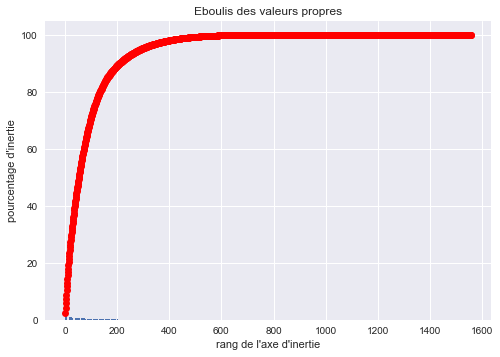

In [15]:
n_comp = len(X_std.iloc[:,:-1].columns)
    
import prince
pca= prince.PCA(
n_components= n_comp,
n_iter=3,
copy=True,
check_input=True,
engine='auto',
random_state=42)
pca = pca.fit(X_std)

def display_scree_plot(pca):
    scree = pca.explained_inertia_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

display_scree_plot(pca)

 En regardant la figure, nous constatons que même les composantes principale à la plus forte valeur propre ne captent qu'une très faible inertie. Par contre une inflexion d'inertie ajoutée est clairement visible autour des 200 première valeurs propres.
 
 Calculons le pourcentage d'inertie concervée avec ce seuil.

In [16]:
print(f"Pourcentage d'inertie concervée avec les 200 premières composantes principales {round(pca.explained_inertia_[0:200].sum()*100,2)}%")

Pourcentage d'inertie concervée avec les 200 premières composantes principales 89.24%


In [216]:
%%time

import prince
pca = prince.PCA(
n_components= 200,
n_iter=3,
copy=True,
check_input=True,
engine='auto',
random_state=42)
pca = pca.fit(X_std)

transformed_data = pca.transform(X_std)

CPU times: user 1.62 s, sys: 559 ms, total: 2.18 s
Wall time: 1.23 s


In [217]:
transformed_data

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
1,-0.762460,-0.274512,-0.396043,-0.954840,2.991010,0.543811,0.325614,3.583869,-2.447508,2.285572,...,-4.259279,1.710342,-1.123613,0.301305,-0.944310,1.795150,2.376858,-1.004728,2.441021,-0.521559
2,0.109160,0.373534,-0.077994,-1.354355,4.566384,1.053963,1.491418,3.889780,-2.396359,2.232990,...,2.743524,0.847325,1.954327,0.606823,0.311947,-4.456559,0.002677,1.452351,-2.481277,-1.678467
3,-0.808546,-0.465801,-0.398368,-1.413400,4.848219,1.096348,0.519634,4.260693,-2.742147,2.756066,...,2.392484,-0.524706,0.723183,-0.099593,1.128156,-1.191123,-1.525188,-0.001602,-1.464439,0.546403
4,-0.755208,-0.323408,-0.315253,-1.715833,5.809427,1.243629,0.477214,4.128127,-2.812214,3.061602,...,2.134804,-0.242741,1.231423,0.666548,0.766581,-0.846751,-2.126541,0.128777,-1.877533,0.892676
5,8.382406,17.419535,-0.650916,-0.020840,0.031908,-0.063911,2.015710,5.428790,-4.141955,-17.075706,...,-0.071774,-0.422391,0.666931,-2.484001,-2.205955,-2.086656,-1.215135,2.859970,1.976540,-0.462227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,-0.613916,-0.454900,-0.353110,-0.165209,-0.219928,-0.278166,-0.074192,1.077390,-0.603921,0.518284,...,1.092146,0.793161,1.069879,0.295515,1.374890,-2.352269,2.866978,0.968072,-2.346783,2.109826
2456,-0.823769,-0.590673,-0.361308,-0.135711,-0.136266,-0.342269,-0.180116,0.550773,-0.542022,0.504955,...,2.680451,-3.893973,-0.613514,2.209942,1.361564,-1.713270,1.356393,0.506083,0.010290,-1.608972
2457,-0.795179,-0.519729,-0.374311,-0.122065,-0.226156,-0.219979,-0.105654,1.045472,-0.607435,0.804001,...,0.099937,-0.636098,1.710754,0.066855,-1.474167,-1.362392,-2.669901,-0.866847,-0.597942,1.351693
2458,-1.267080,-1.048213,-0.914515,-0.111058,-0.506551,-0.456453,-0.309202,7.929176,-6.604362,8.349477,...,-0.065688,0.029021,0.163455,0.014833,0.012851,-0.071708,0.035244,-0.071449,0.048471,-0.043236


## Trsanformation numérique de la variable à prédire

Les modèles n'étant pas capable de gérer le formatage sous forme de chaîne de caractères des modalités "ad." et "noad.", nous transformons numériquement ces modalités (0: "nonad", 1: "ad.")

In [19]:
y = y.apply(lambda x: 0 if x == 'nonad.' else 1 )
y

1       1
2       1
3       1
4       1
5       1
       ..
2455    0
2456    0
2457    0
2458    0
2459    0
Name: outcome, Length: 2459, dtype: int64

## Partitionnement du jeu de données en entre jeu d'entraînement et jeu de test

Nous allons utiliser 80% des données pour le jeu d'entraînement et 20% pour le jeu de test. Lors du partitionement nous appliquons également une stratification sur la variable à prédire afin de garder la même répartition des classes.

In [243]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(transformed_data, y, test_size=0.2, stratify=y , random_state=42)

print(f"Nombre d'observation de X_train {X_train.shape[0]}")
print(f"Nombre d'observation de X_test {X_test.shape[0]}")
print(f"Nombre d'observation de y_train {y_train.shape[0]}")
print(f"Nombre d'observation de y_train {y_test.shape[0]}")

Nombre d'observation de X_train 1967
Nombre d'observation de X_test 492
Nombre d'observation de y_train 1967
Nombre d'observation de y_train 492


## Entraînement des modèles

- Baseline : prédiction par la classe majoritaire
- Regression logistique non pénalisée
- Pregression logistiques ridge et lasso
- Arbre de décision
- Forêt aléatoire
- Gradient boosting

Nous créons tout d'abord deux fonctions. 

La première print_metric permet d'afficher pour un modèle passé en paramètre:
- le meilleur pramètre de seuil Tetha
- la précision ajustée, le rappel, la justesse, le F1 score 
- la matrice de confusion

Le paramètre best_estimator permet de spécifier si le modèle passé en paramètres a fait l'objet au préalable d'un entrainement avec une validation sur grille de paramètres sur plusieurs K-folds. 
Dans ce cas, les indicateurs sont donnés pour les deux classes. Dans le cas constraire, la fonction calcule les scores avec une validation croisée sur 5 K-Folds. Elle affiche ensuite la moyenne et l'écart type de ces scores pour la classe positive ("nonadd.")

La seconde plot_roc_auc permet de comparer les courbe ROC de plusieurs modèles en les superposant.

In [261]:
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, roc_auc_score, precision_score, recall_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict


def print_metrics(model, X, y, label='model name', best_estimator=False, best_theta=True):
   
    if best_estimator == True:
        pred = model.predict_proba(X)
    
    else:
        pred = cross_val_predict(model, X, y, method='predict_proba', cv=5, n_jobs=-1 ) 
    
    preds = [ p[1] for p in pred ]
    
    fpr, tpr, thresholds = metrics.roc_curve(y, preds)
    
    if best_theta == True:
        best_theta=thresholds[np.argmax(tpr - fpr)]
        
    print(f'Score pour le modèle {label} :')
    if best_estimator == True:
        #print(model.best_estimator_)
        print(model)
    else:
        print(model)
        
    print('-----------------------------------------------------')
    print('Meilleur paramètre seuil Tetha', best_theta)
    
    if best_estimator == True:
        print(metrics.classification_report(y, (np.array(preds) > best_theta).astype(int), zero_division=0))
        print('ROC score', metrics.roc_auc_score(y, preds))
        
    else: 
        for score in ["roc_auc", "balanced_accuracy", "recall", "precision", "f1"]:
            cvs = cross_val_score(model, X_train, y_train, scoring=score, cv=5, n_jobs=-1)
            print(f"{score} moyen par validation croisée : {cvs.mean()}, +/- {np.std(cvs):.3f}")
     
   
    
    m=metrics.confusion_matrix((np.array(preds) > best_theta).astype(int),y)
    p=np.round(np.divide(m, y.shape[0]) *100, 1)
    ax = sns.heatmap(p, annot=True, fmt='.1f', cbar=False, cmap="Blues", yticklabels=['nonad.','ad.'], xticklabels=['nonad.','ad.'])
    ax.set(xlabel='Etiquette', ylabel='Prediction')
    plt.show()
    
    
def plot_roc_auc(models, X, y, best_estimator=False):
    '''
    input:
    
    model: dict of models. keys correspond to names of models.
    y: array of y labels
    x: array of x labels
    
    '''
    fig = plt.figure(figsize=(9,9))
    plt.title('Courbes ROC')
    
    for name, model in models.items():
        if best_estimator == True:
            pred = model.predict_proba(X)
        else:
            pred = cross_val_predict(model, X, y,  method='predict_proba', cv=5, n_jobs=-1) 
            
        preds = [p[1] for p in pred]

        fpr, tpr, thresholds = metrics.roc_curve(y, preds)

        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'{name}')
    
    plt.legend(loc='lower right')
    
    # Diagonal 45 degree line
    plt.plot([0,1], [0,1], 'k--')
    
    # Axes limits and labels
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.ylabel('Taux de vrai positifs')
    plt.xlabel('Taux de faux positif')
    plt.show()

### Modèle baseline 

Score pour le modèle baseline :
DummyClassifier(strategy='most_frequent')
-----------------------------------------------------
Meilleur paramètre seuil Tetha 1.0
roc_auc moyen par validation croisée : 0.5, +/- 0.000
balanced_accuracy moyen par validation croisée : 0.5, +/- 0.000
recall moyen par validation croisée : 0.0, +/- 0.000
precision moyen par validation croisée : 0.0, +/- 0.000
f1 moyen par validation croisée : 0.0, +/- 0.000


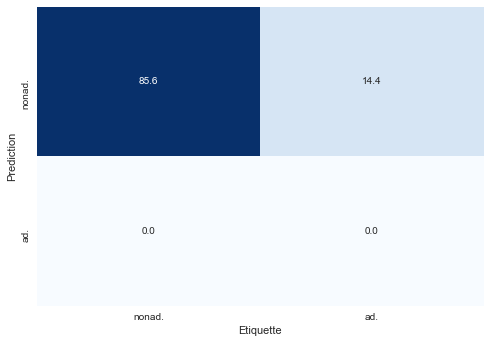

In [246]:
from sklearn.dummy import DummyClassifier
models = {}

baseline =  DummyClassifier(strategy="most_frequent")
baseline.fit(X_train, y_train)
models['baseline'] = baseline
print_metrics(baseline, X=X_train, y=y_train, label='baseline')

## Regression logistique non pénalisée

Score pour le modèle lr :
LogisticRegression(penalty='none')
-----------------------------------------------------
Meilleur paramètre seuil Tetha 0.25313150136333
roc_auc moyen par validation croisée : 0.9564794156508978, +/- 0.008
balanced_accuracy moyen par validation croisée : 0.9011666778221518, +/- 0.021
recall moyen par validation croisée : 0.8415413533834586, +/- 0.043
precision moyen par validation croisée : 0.7853441599204312, +/- 0.037
f1 moyen par validation croisée : 0.8113925513982044, +/- 0.028


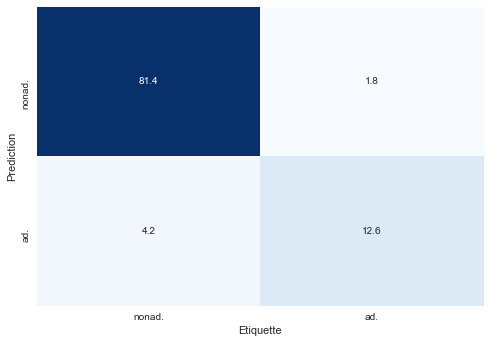

In [247]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='none')
lr.fit(X_train, y_train)
models['lr'] = lr
print_metrics(lr, X=X_train, y=y_train, label='lr')

## Modèle de regression logistique Ridge

Score pour le modèle ridge :
LogisticRegression(random_state=42)
-----------------------------------------------------
Meilleur paramètre seuil Tetha 0.15297180384804562
roc_auc moyen par validation croisée : 0.9773420011452965, +/- 0.006
balanced_accuracy moyen par validation croisée : 0.9130180328417483, +/- 0.024
recall moyen par validation croisée : 0.8414786967418546, +/- 0.049
precision moyen par validation croisée : 0.903620628037104, +/- 0.039
f1 moyen par validation croisée : 0.8701441853160221, +/- 0.029


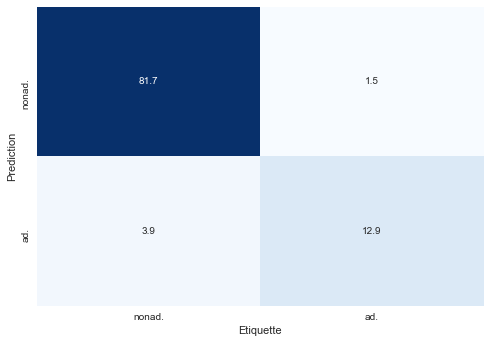

In [248]:
from sklearn.linear_model import LogisticRegression

ridge = LogisticRegression(penalty='l2', random_state=42)
ridge.fit(X_train, y_train)
models['ridge'] = ridge
print_metrics(ridge, X=X_train, y=y_train, label='ridge')

## Modèle de regression logistique Lasso

Score pour le modèle lasso :
LogisticRegression(penalty='l1', random_state=42, solver='saga')
-----------------------------------------------------
Meilleur paramètre seuil Tetha 0.2506139696744109
roc_auc moyen par validation croisée : 0.9789099355708757, +/- 0.006
balanced_accuracy moyen par validation croisée : 0.9116133248551644, +/- 0.020
recall moyen par validation croisée : 0.830952380952381, +/- 0.040
precision moyen par validation croisée : 0.9486412940417945, +/- 0.027
f1 moyen par validation croisée : 0.8852545333127857, +/- 0.026


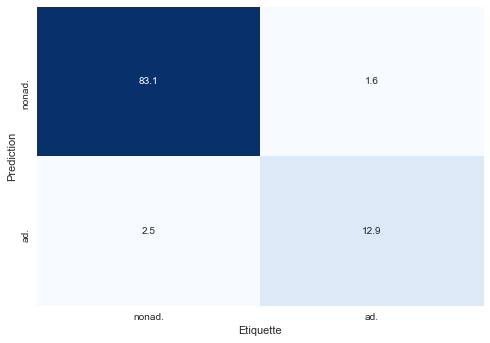

In [249]:
from sklearn.linear_model import LogisticRegression

lasso = LogisticRegression(penalty='l1',random_state=42, solver='saga')
lasso.fit(X_train, y_train)
models['lasso'] = lasso
print_metrics(lasso, X=X_train, y=y_train, label='lasso')

## Arbre de décision

Score pour le modèle arbre_decision :
DecisionTreeClassifier(random_state=42)
-----------------------------------------------------
Meilleur paramètre seuil Tetha 1.0
roc_auc moyen par validation croisée : 0.8916249265597227, +/- 0.019
balanced_accuracy moyen par validation croisée : 0.8914304027873838, +/- 0.018
recall moyen par validation croisée : 0.8203007518796992, +/- 0.038
precision moyen par validation croisée : 0.7888068650765387, +/- 0.035
f1 moyen par validation croisée : 0.8033781182168427, +/- 0.026


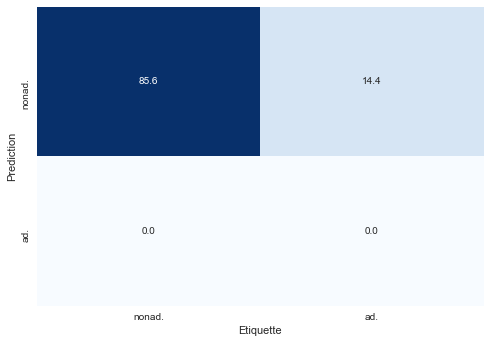

In [250]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
models['abrbre_decision'] = dt
print_metrics(dt, X=X_train, y=y_train, label='arbre_decision')

## Forêt aléatoire

Score pour le modèle foret_aleatoire :
RandomForestClassifier(random_state=42)
-----------------------------------------------------
Meilleur paramètre seuil Tetha 0.21
roc_auc moyen par validation croisée : 0.9736514722761405, +/- 0.009
balanced_accuracy moyen par validation croisée : 0.9171445397618676, +/- 0.024
recall moyen par validation croisée : 0.8414160401002506, +/- 0.049
precision moyen par validation croisée : 0.9535171551137938, +/- 0.032
f1 moyen par validation croisée : 0.8927625953945328, +/- 0.028


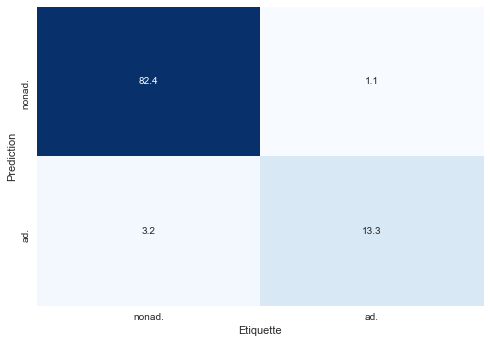

In [251]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
models['foret_aleatoire'] = rf
print_metrics(rf, X=X_train, y=y_train, label='foret_aleatoire')

## Extra-trees

Score pour le modèle extra_trees :
ExtraTreesClassifier(random_state=42)
-----------------------------------------------------
Meilleur paramètre seuil Tetha 0.24
roc_auc moyen par validation croisée : 0.9728977178356375, +/- 0.006
balanced_accuracy moyen par validation croisée : 0.8956698589946678, +/- 0.024
recall moyen par validation croisée : 0.7990601503759398, +/- 0.049
precision moyen par validation croisée : 0.9464854766982427, +/- 0.026
f1 moyen par validation croisée : 0.8655892454370597, +/- 0.031


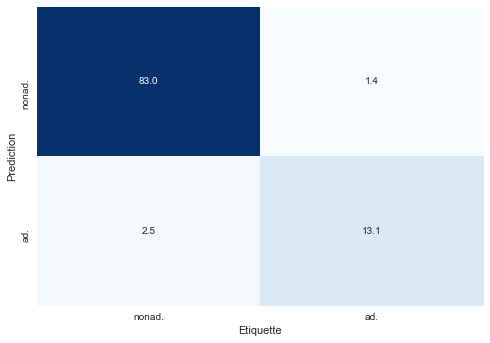

In [252]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(random_state=42)
et.fit(X_train, y_train)
models['extra_trees'] = et
print_metrics(et, X=X_train, y=y_train, label='extra_trees')

## Gradient boosting

Score pour le modèle gradient_boosting :
GradientBoostingClassifier(random_state=42)
-----------------------------------------------------
Meilleur paramètre seuil Tetha 0.06329633756341614
roc_auc moyen par validation croisée : 0.9727736440507797, +/- 0.008
balanced_accuracy moyen par validation croisée : 0.9135523805805313, +/- 0.029
recall moyen par validation croisée : 0.8449248120300752, +/- 0.055
precision moyen par validation croisée : 0.8895045049032408, +/- 0.045
f1 moyen par validation croisée : 0.8658701209439521, +/- 0.044


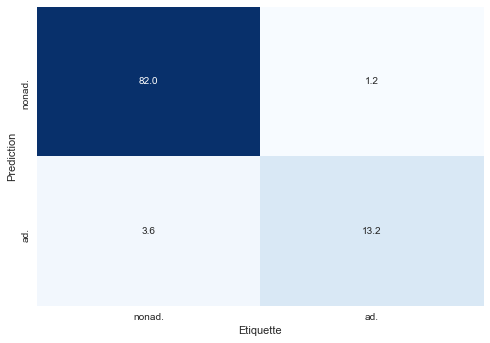

In [253]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
models['gradient_boosting'] = gb
print_metrics(gb, X=X_train, y=y_train, label='gradient_boosting')

Vraissemblablement la ferêt aléatoire offre les meilleures performances sur tous les indicateurs. Regardons ces paramètres.

## Optimisation des paramètres

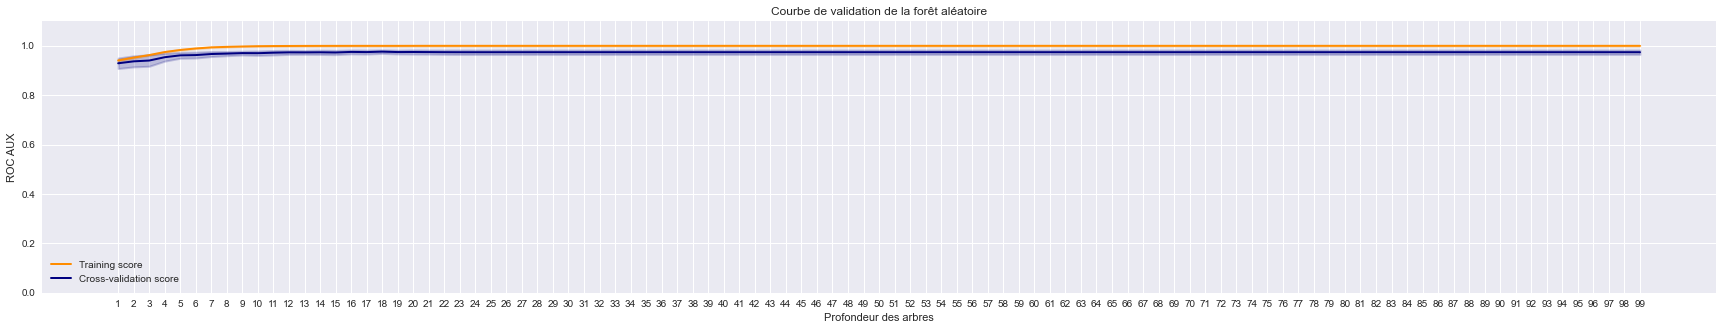

CPU times: user 3.07 s, sys: 658 ms, total: 3.73 s
Wall time: 5min 7s


In [254]:
%%time
from sklearn.model_selection import validation_curve

param_range = np.arange(1,100,1)
train_scores, test_scores = validation_curve(
                                RandomForestClassifier(random_state=42),
                                X = X_train, y = y_train, 
                                param_name = 'max_depth', 
                                param_range = param_range,
                                scoring = 'roc_auc',
                                cv = 5,
                                n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


plt.figure(figsize=((30,5)))
plt.title("Courbe de validation de la forêt aléatoire")
plt.xlabel("Profondeur des arbres")
plt.ylabel("ROC AUX")
plt.ylim(0.0, 1.1)
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.xticks(param_range)
plt.legend(loc="best")
plt.show()

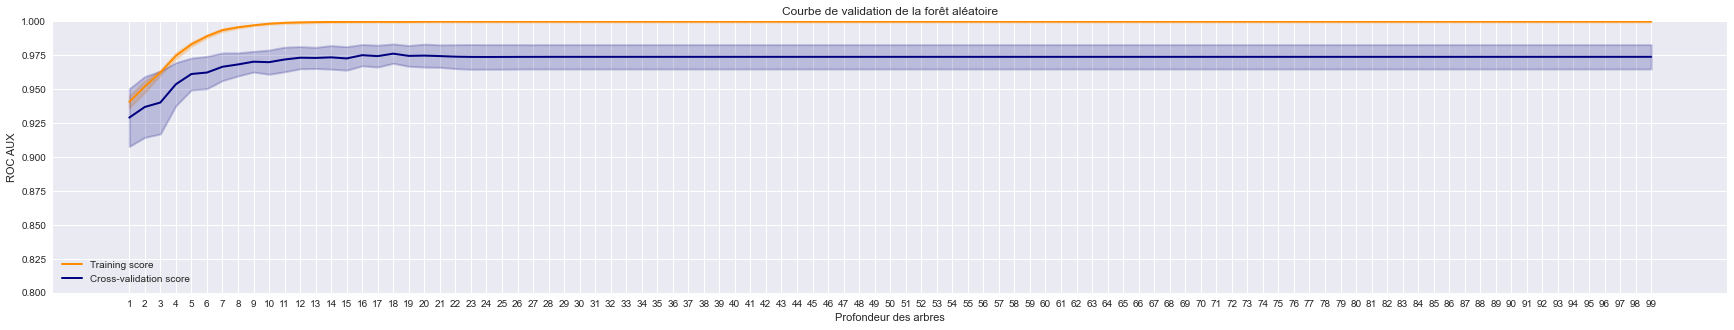

In [255]:
plt.figure(figsize=((30,5)))
plt.title("Courbe de validation de la forêt aléatoire")
plt.xlabel("Profondeur des arbres")
plt.ylabel("ROC AUX")
plt.ylim(0.8,1)
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.xticks(param_range)
plt.legend(loc="best")
plt.show()

Score pour le modèle optimized_rf :
RandomForestClassifier(max_depth=20, n_estimators=1000, random_state=42)
-----------------------------------------------------
Meilleur paramètre seuil Tetha 0.512016708694264
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1683
           1       1.00      0.99      1.00       284

    accuracy                           1.00      1967
   macro avg       1.00      1.00      1.00      1967
weighted avg       1.00      1.00      1.00      1967

ROC score 0.9994298829220122


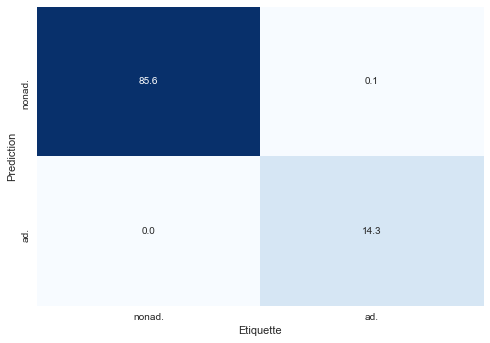

CPU times: user 25.2 s, sys: 1.84 s, total: 27 s
Wall time: 57min 31s


In [256]:
%%time
from sklearn.model_selection import RandomizedSearchCV
optimized_rf = RandomForestClassifier(random_state=42)
params = {
          'max_depth': [14,18,20],
          'min_samples_leaf': [1, 2, 3,  4, 5, 6],
          'min_samples_split': [2, 4, 5, 6, 8, 10],
          'n_estimators' : [200, 400, 600, 800, 1000, 1200, 1600, 1800, 2000]
               }

model = RandomizedSearchCV(
                            estimator=optimized_rf,
                            n_iter = 100,
                            param_distributions=params,
                            scoring = ["roc_auc", "balanced_accuracy"],
                            refit = "roc_auc",
                            cv=5,
                            n_jobs = -1
                            )
model.fit(X_train, y_train)
print_metrics(model, X=X_train, y=y_train, label='optimized_rf',best_estimator=True)

In [257]:
model.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 20}

Score pour le modèle optimized_rf :
RandomForestClassifier(max_depth=20, n_estimators=1000, random_state=42)
-----------------------------------------------------
Meilleur paramètre seuil Tetha 0.512016708694264
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1683
           1       1.00      0.99      1.00       284

    accuracy                           1.00      1967
   macro avg       1.00      1.00      1.00      1967
weighted avg       1.00      1.00      1.00      1967

ROC score 0.9994298829220122


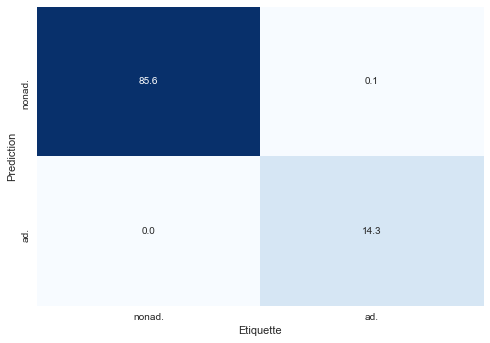

CPU times: user 22.5 s, sys: 1.08 s, total: 23.6 s
Wall time: 25min 22s


In [258]:
%%time
from sklearn.model_selection import GridSearchCV
optimized_rf = RandomForestClassifier(random_state=42, max_depth=20)
params = {
          'min_samples_leaf': [1, 2, 3],
          'min_samples_split': [2, 4, 6],
          'n_estimators' : [800, 900, 1000, 1100, 1200]
               }

model = GridSearchCV(
                    estimator=optimized_rf,
                    param_grid=params,
                    scoring = ["roc_auc", "balanced_accuracy"],
                    refit = "roc_auc",
                    cv=5,
                    n_jobs = -1
                    )
model.fit(X_train, y_train)
models['optimized_rf'] = model.best_estimator_
print_metrics(model, X=X_train, y=y_train, label='optimized_rf',best_estimator=True)

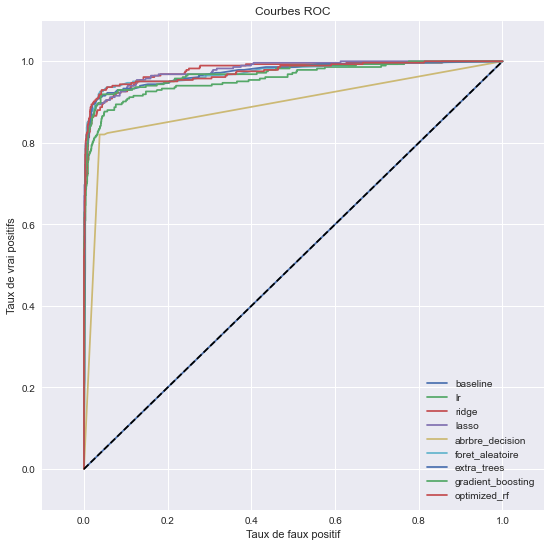

In [259]:
plot_roc_auc(models, X_train, y_train, best_estimator=False)

Score pour le modèle optimized_rf :
RandomForestClassifier(max_depth=20, n_estimators=1000, random_state=42)
-----------------------------------------------------
Meilleur paramètre seuil Tetha 0.30591827329146937
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       421
           1       0.87      0.87      0.87        71

    accuracy                           0.96       492
   macro avg       0.93      0.93      0.93       492
weighted avg       0.96      0.96      0.96       492

ROC score 0.9701582416111875


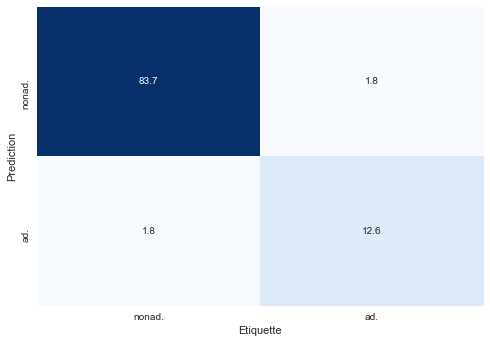

In [262]:
print_metrics(models['optimized_rf'], X=X_test, y=y_test, label='optimized_rf',best_estimator=True)

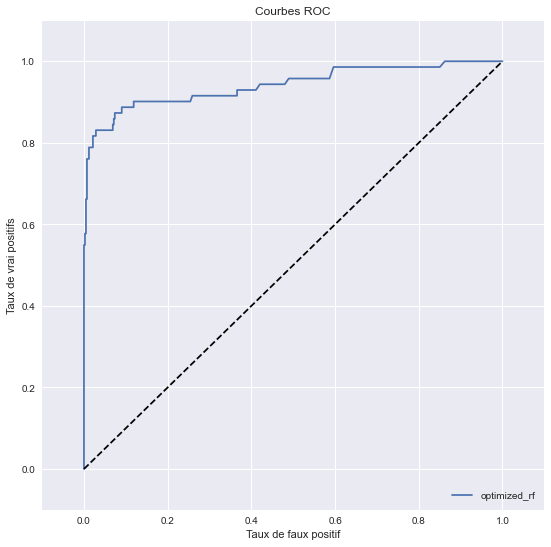

In [263]:
final_model =  {}
final_model['optimized_rf'] = models['optimized_rf']
plot_roc_auc(final_model, X_test, y_test, best_estimator=False)

## Rentrainement du model optimizé sur toutes les données d'entrainement mises à dispositiomise à disposition pour le challenge

In [267]:
import pickle
models['optimized_rf'].fit(transformed_data, y)
filename = 'modele_final.sav'
pickle.dump(models['optimized_rf'], open(filename, 'wb'))

## Prédictions sur le jeu de test

In [339]:
data_test = pd.read_csv('data_test.csv', sep='\t')
display(data_test.head(10))

data_test_copy = data_test.select_dtypes(['int','float']).copy()

knn_imputer_3 =  KNNImputer(weights="distance", n_neighbors=3,copy=False)
knn_imputer_3.fit(data_copy)
imputed_test_knn = pd.DataFrame(np.round_(knn_imputer_3.transform(data_test_copy)),columns=data_test_copy.columns, index=data_test_copy.index)


data_test['X1'] = imputed_test_knn['X1']
data_test['X2'] = imputed_test_knn['X2']
data_test['X3'] =  np.round_((data_test['X2'] / data_test['X1']),0)
data_test['X4'] = imputed_test_knn['X4']

scaler.fit(data.loc[:,['X1', 'X2', 'X3']])

X_final_test_std= pd.DataFrame(scaler.transform(data_test.loc[:,['X1', 'X2', 'X3']]), columns = data_test.loc[:,['X1', 'X2', 'X3']].columns, index = data_test.index)
X_final_test_std = pd.concat([X_final_test_std, data_test.iloc[:,3:]], axis=1)

X_final_test_transformed = pca.transform(X_final_test_std)

y_final_test =  pd.Series(models['optimized_rf'].predict(X_final_test_transformed), index=X_final_test_transformed.index)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X1549,X1550,X1551,X1552,X1553,X1554,X1555,X1556,X1557,X1558
2460,125.0,125.0,1.0000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2461,57.0,468.0,8.2105,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2462,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2463,125.0,125.0,1.0000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2464,30.0,585.0,19.5000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2465,90.0,60.0,0.6666,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2466,90.0,60.0,0.6666,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2467,NaN,NaN,NaN,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2468,60.0,234.0,3.9000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2469,60.0,88.0,1.4666,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [289]:
y_final_test.value_counts()

y_test
0         723
1          97
dtype: int64

In [290]:
y_final_test

y_test    int64
dtype: object

In [298]:
y_final_test.index

Int64Index([2460, 2461, 2462, 2463, 2464, 2465, 2466, 2467, 2468, 2469,
            ...
            3270, 3271, 3272, 3273, 3274, 3275, 3276, 3277, 3278, 3279],
           dtype='int64', length=820)

In [340]:
y_final_test_outcome = y_final_test.map({0:'nonad.', 1:'ad.'})
y_final_test_outcome

2460       ad.
2461       ad.
2462       ad.
2463       ad.
2464       ad.
         ...  
3275    nonad.
3276    nonad.
3277    nonad.
3278    nonad.
3279    nonad.
Length: 820, dtype: object

In [306]:
y_final_test_outcome.value_counts()

nonad.    723
ad.        97
dtype: int64

In [342]:
y_final_test_outcome =  pd.DataFrame(y_final_test_outcome, columns=['pred'])
y_final_test_outcome.reset_index(inplace=True, drop=True)

In [343]:
y_final_test_outcome

,pred
0,ad.
1,ad.
2,ad.
3,ad.
4,ad.
...,...
815,nonad.
816,nonad.
817,nonad.
818,nonad.


In [345]:
y_final_test_outcome.to_csv('LeSoSi_pred.csv', index=False)

In [193]:
data_test

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X1549,X1550,X1551,X1552,X1553,X1554,X1555,X1556,X1557,X1558
2460,NaN,NaN,NaN,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2461,NaN,NaN,NaN,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2462,NaN,NaN,NaN,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2463,NaN,NaN,NaN,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2464,NaN,NaN,NaN,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3275,NaN,NaN,NaN,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3276,NaN,NaN,NaN,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3277,NaN,NaN,NaN,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3278,NaN,NaN,NaN,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [188]:
data.iloc[:,3:-1]

,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,...,X1549,X1550,X1551,X1552,X1553,X1554,X1555,X1556,X1557,X1558
1,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,0.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2456,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2457,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2458,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Backup

In [ ]:
x4_by_outcome_original_all_outcome_x4 = pd.DataFrame(data.groupby(['X4'], as_index=False)['outcome'].agg('count'))
x4_by_outcome_original_all_outcome_x4.rename(columns={'X4':'modalité', 'outcome':'observations'}, inplace=True)
x4_by_outcome_original_all_outcome_x4.set_index('modalité', inplace=True)
x4_by_outcome_original_all_outcome_x4

In [ ]:
data["X4"].value_counts(dropna=False)

In [ ]:
fig= plt.figure(figsize=(20,10))



sns.kdeplot(data=data, x="X1", label="original")
sns.kdeplot(data=simple_imputed, x="X1", label="mean")
sns.kdeplot(data=knn_imputed_1, x="X1", label="knn-1")
sns.kdeplot(data=knn_imputed_2, x="X1", label="knn-2")
sns.kdeplot(data=knn_imputed_3, x="X1", label="knn-3")
sns.kdeplot(data=knn_imputed_5, x="X1", label="knn-5")



#inputed with iterative imputer
#sns.histplot(ax=axes[6], data=iterative_imputed,  x="X1", bins=bins, kde=True)
#axes[6].set_title("Distribution avec imputation modèle iteratif")
plt.legend()
plt.show()

In [ ]:
fig= plt.figure(figsize=(20,10))



sns.kdeplot(data=data, x="X2", label="original")
sns.kdeplot(data=simple_imputed, x="X2", label="mean")
sns.kdeplot(data=knn_imputed_1, x="X2", label="knn-1")
sns.kdeplot(data=knn_imputed_2, x="X2", label="knn-2")
sns.kdeplot(data=knn_imputed_3, x="X2", label="knn-3")
sns.kdeplot(data=knn_imputed_5, x="X2", label="knn-5")

#inputed with iterative imputer
#sns.histplot(ax=axes[6], data=iterative_imputed,  x="X1", bins=bins, kde=True)
#axes[6].set_title("Distribution avec imputation modèle iteratif")
plt.legend()
plt.show()

In [ ]:
fig= plt.figure(figsize=(20,10))



sns.kdeplot(data=data, x="X3", label="original")
sns.kdeplot(data=simple_imputed, x="X3", label="mean")
sns.kdeplot(data=knn_imputed_1, x="X3", label="knn-1")
sns.kdeplot(data=knn_imputed_2, x="X3", label="knn-2")
sns.kdeplot(data=knn_imputed_3, x="X3", label="knn-3")
sns.kdeplot(data=knn_imputed_5, x="X3", label="knn-5")

#inputed with iterative imputer
#sns.histplot(ax=axes[6], data=iterative_imputed,  x="X1", bins=bins, kde=True)
#axes[6].set_title("Distribution avec imputation modèle iteratif")
plt.legend()
plt.show()

In [ ]:
fig= plt.figure(figsize=(20,10))



sns.kdeplot(data=data[data['outcome']== 'nonad.'], x="X3", label="original")
sns.kdeplot(data=simple_imputed[simple_imputed['outcome']== 'nonad.'], x="X3", label="mean")
sns.kdeplot(data=knn_imputed_1[knn_imputed_1['outcome']== 'nonad.'], x="X3", label="knn-1")
sns.kdeplot(data=knn_imputed_2[knn_imputed_2['outcome']== 'nonad.'], x="X3", label="knn-2")
sns.kdeplot(data=knn_imputed_3[knn_imputed_3['outcome']== 'nonad.'], x="X3", label="knn-3")
sns.kdeplot(data=knn_imputed_5[knn_imputed_5['outcome']== 'nonad.'], x="X3", label="knn-5")

#inputed with iterative imputer
#sns.histplot(ax=axes[6], data=iterative_imputed,  x="X1", bins=bins, kde=True)
#axes[6].set_title("Distribution avec imputation modèle iteratif")
plt.legend()
plt.show()

In [ ]:
fig= plt.figure(figsize=(20,10))



sns.kdeplot(data=data[data['outcome']== 'ad.'], x="X3", label="original")
sns.kdeplot(data=simple_imputed[simple_imputed['outcome']== 'nad.'], x="X3", label="mean")
sns.kdeplot(data=knn_imputed_1[knn_imputed_1['outcome']== 'ad.'], x="X3", label="knn-1")
sns.kdeplot(data=knn_imputed_2[knn_imputed_2['outcome']== 'ad.'], x="X3", label="knn-2")
sns.kdeplot(data=knn_imputed_3[knn_imputed_3['outcome']== 'ad.'], x="X3", label="knn-3")
sns.kdeplot(data=knn_imputed_5[knn_imputed_5['outcome']== 'ad.'], x="X3", label="knn-5")

#inputed with iterative imputer
#sns.histplot(ax=axes[6], data=iterative_imputed,  x="X1", bins=bins, kde=True)
#axes[6].set_title("Distribution avec imputation modèle iteratif")
plt.legend()
plt.show()

In [ ]:
fig= plt.figure(figsize=(20,10))



sns.kdeplot(data=data[data['outcome']== 'ad.'], x="X1", label="original")
sns.kdeplot(data=simple_imputed[simple_imputed['outcome']== 'nad.'], x="X1", label="mean")
sns.kdeplot(data=knn_imputed_1[knn_imputed_1['outcome']== 'ad.'], x="X1", label="knn-1")
sns.kdeplot(data=knn_imputed_2[knn_imputed_2['outcome']== 'ad.'], x="X1", label="knn-2")
sns.kdeplot(data=knn_imputed_3[knn_imputed_3['outcome']== 'ad.'], x="X1", label="knn-3")
sns.kdeplot(data=knn_imputed_5[knn_imputed_5['outcome']== 'ad.'], x="X1", label="knn-5")

#inputed with iterative imputer
#sns.histplot(ax=axes[6], data=iterative_imputed,  x="X1", bins=bins, kde=True)
#axes[6].set_title("Distribution avec imputation modèle iteratif")
plt.legend()
plt.show()

In [ ]:
fig= plt.figure(figsize=(20,10))



sns.kdeplot(data=data[data['outcome']== 'ad.'], x="X2", label="original")
sns.kdeplot(data=simple_imputed[simple_imputed['outcome']== 'nad.'], x="X2", label="mean")
sns.kdeplot(data=knn_imputed_1[knn_imputed_1['outcome']== 'ad.'], x="X2", label="knn-1")
sns.kdeplot(data=knn_imputed_2[knn_imputed_2['outcome']== 'ad.'], x="X2", label="knn-2")
sns.kdeplot(data=knn_imputed_3[knn_imputed_3['outcome']== 'ad.'], x="X2", label="knn-3")
sns.kdeplot(data=knn_imputed_5[knn_imputed_5['outcome']== 'ad.'], x="X2", label="knn-5")

#inputed with iterative imputer
#sns.histplot(ax=axes[6], data=iterative_imputed,  x="X1", bins=bins, kde=True)
#axes[6].set_title("Distribution avec imputation modèle iteratif")
plt.legend()
plt.show()